In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import train_test_split



    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

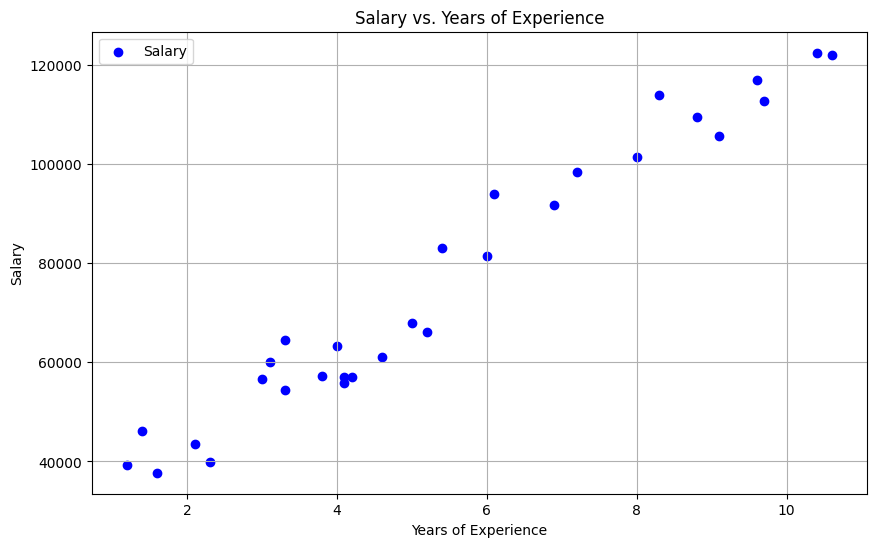

In [2]:
df = pd.read_csv("../data/Salary_dataset.csv")

print(df)

# Show whole data set
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Salary')
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Cost Function
def calc_cost(X_train, y_train, w, b):

    # Number of training examples
    m = X_train.shape[0]
    
    # Calculate all predictions in a vectorized way
    y_hats = w * X_train['YearsExperience'] + b
    
    # Compute the squared errors
    squared_errors = (y_hats - y_train['Salary']) ** 2

    # Calculate the cost, now dividing by 2m
    return squared_errors.sum() / (2 * m)


    

In [4]:
# Split into training set

X_df = df[['YearsExperience']]
y_df = df[['Salary']]
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

cost = calc_cost(X_train, y_train, 0, 0)

print(cost)




3135614129.3541665
